## Excesice 1  Pandas基本操作

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 20

In [2]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df=pd.DataFrame(data=exam_data,index=labels)
print(df)
# 以labels为行索引，生成一个exam_data的DataFrame


        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes
d      James    NaN         3      no
e      Emily    9.0         2      no
f    Michael   20.0         3     yes
g    Matthew   14.5         1     yes
h      Laura    NaN         1      no
i      Kevin    8.0         2      no
j      Jonas   19.0         1     yes


In [3]:
# df的行索引
print(df.index)

#  df的列索引
print(df.columns)

# df的形状
print(df.shape)

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')
Index(['name', 'score', 'attempts', 'qualify'], dtype='object')
(10, 4)


In [4]:
# 写出至少2种方式访问某一行
print(df.loc['a'])
print()
print(df.iloc[0])
print()
print(df[0:1])

name        Anastasia
score            12.5
attempts            1
qualify           yes
Name: a, dtype: object

name        Anastasia
score            12.5
attempts            1
qualify           yes
Name: a, dtype: object

        name  score  attempts qualify
a  Anastasia   12.5         1     yes


In [5]:
# 写出至少2种方式访问某一列
print(df.loc[:,'name'])
print()
print(df.iloc[:,0])
print()
print(df['name'])


a    Anastasia
b         Dima
c    Katherine
d        James
e        Emily
f      Michael
g      Matthew
h        Laura
i        Kevin
j        Jonas
Name: name, dtype: object

a    Anastasia
b         Dima
c    Katherine
d        James
e        Emily
f      Michael
g      Matthew
h        Laura
i        Kevin
j        Jonas
Name: name, dtype: object

a    Anastasia
b         Dima
c    Katherine
d        James
e        Emily
f      Michael
g      Matthew
h        Laura
i        Kevin
j        Jonas
Name: name, dtype: object


In [6]:
# df的基本信息
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10 non-null     object 
 1   score     8 non-null      float64
 2   attempts  10 non-null     int64  
 3   qualify   10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes


In [7]:
# df的统计信息 describe
df.describe()

,score,attempts
count,8.000000,10.000000
mean,13.562500,1.900000
std,4.693746,0.875595
min,8.000000,1.000000
25%,9.000000,1.000000
50%,13.500000,2.000000
75%,17.125000,2.750000
max,20.000000,3.000000


In [8]:
# 删去含缺失值的 行
print(df.dropna(axis=0))
# 删去含缺失值的 列
print(df.dropna(axis=1))
# 填充缺失值（均值填充/前向填充）
df.fillna(method='ffill')
df.fillna(df.mean(axis=0))

        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes
e      Emily    9.0         2      no
f    Michael   20.0         3     yes
g    Matthew   14.5         1     yes
i      Kevin    8.0         2      no
j      Jonas   19.0         1     yes
        name  attempts qualify
a  Anastasia         1     yes
b       Dima         3      no
c  Katherine         2     yes
d      James         3      no
e      Emily         2      no
f    Michael         3     yes
g    Matthew         1     yes
h      Laura         1      no
i      Kevin         2      no
j      Jonas         1     yes


,name,score,attempts,qualify
a,Anastasia,12.5000,1,yes
b,Dima,9.0000,3,no
c,Katherine,16.5000,2,yes
d,James,13.5625,3,no
e,Emily,9.0000,2,no
f,Michael,20.0000,3,yes
g,Matthew,14.5000,1,yes
h,Laura,13.5625,1,no
i,Kevin,8.0000,2,no
j,Jonas,19.0000,1,yes


In [9]:
df1 = pd.DataFrame({'lkey': ['a', 'b', 'c'],
                   'value': [1, 2, 3]})
df2 = pd.DataFrame({'value': [5, 6, 7, 8, 9],
                    'rkey': ['e', 'd', 'c', 'b', 'a']})

In [10]:
# 将df1， df2 分别保存在同一个 Excel 文件的不同 Sheet中
with pd.ExcelWriter('output.xlsx') as writer:
    df1.to_excel(writer,sheet_name='sheet1')
    df2.to_excel(writer,sheet_name='sheet2')


In [11]:
# 从刚保存的Excel文件中恢复读取出 df1 和 df2
df1=pd.read_excel('output.xlsx',index_col=0,sheet_name='sheet1')
df2=pd.read_excel('output.xlsx',index_col=0,sheet_name='sheet2')


In [12]:
# 分别按 行和列 将 df1 df2 concat
print(df1)
print(df2)
print(pd.concat([df1,df2],axis=0))
print(pd.concat([df1,df2],axis=1))

  lkey  value
0    a      1
1    b      2
2    c      3
   value rkey
0      5    e
1      6    d
2      7    c
3      8    b
4      9    a
  lkey  value rkey
0    a      1  NaN
1    b      2  NaN
2    c      3  NaN
0  NaN      5    e
1  NaN      6    d
2  NaN      7    c
3  NaN      8    b
4  NaN      9    a
  lkey  value  value rkey
0    a    1.0      5    e
1    b    2.0      6    d
2    c    3.0      7    c
3  NaN    NaN      8    b
4  NaN    NaN      9    a


In [13]:
# lkey, rkey为连接键, 将df1, df2 分别按inner和outer方式连接
print(pd.merge(df1,df2,how='inner',left_on='lkey',right_on='rkey'))
print(pd.merge(df1,df2,how='outer',left_on='lkey',right_on='rkey'))


  lkey  value_x  value_y rkey
0    a        1        9    a
1    b        2        8    b
2    c        3        7    c
  lkey  value_x  value_y rkey
0    a      1.0        9    a
1    b      2.0        8    b
2    c      3.0        7    c
3  NaN      NaN        5    e
4  NaN      NaN        6    d


<img src="datasets/img1.jpg" width = "300" height = "300" div align=centre />

In [14]:
# 构建如上图所示的多级索引DataFrame
# int数据由 np.random.randint(0, 150, size=(6, 3) 产生
df3=pd.DataFrame(np.random.randint(0,150,size=(6,3)),index=[['张三','张三','李四','李四','王五','王五'],['期中','期末']*3],columns=['Python','C++','Java'])
df3


Python  C++  Java
张三 期中     108   91    59
   期末       8    6    54
李四 期中      46   82     6
   期末     148   79   130
王五 期中      61   52    92
   期末     146  115   111

In [15]:
# 将df3 变为包含三级索引的 Series
srs=df3.stack()



<img src="datasets/img2.jpg" width = "300" height = "300" div align=centre />

In [16]:
# 将df3 转变为上图所示的df\
srs=srs.swaplevel(0,1)
srs=srs.swaplevel(1,2)
df4=srs.unstack()
df4

张三   李四   王五
期中 Python  108   46   61
   C++      91   82   52
   Java     59    6   92
期末 Python    8  148  146
   C++       6   79  115
   Java     54  130  111

In [17]:
# 取出 张三的所有成绩
print(df4.loc[:,'张三'])
print()
# 取出 李四 Python课程的期末成绩
print(df4.loc[('期末','Python'),'李四'])

期中  Python    108
    C++        91
    Java       59
期末  Python      8
    C++         6
    Java       54
Name: 张三, dtype: int64

148


## Excesice 2 婴儿姓名1880-2010

需要完成的部分已按 1. 2. 3. ...的形式标号

#### 加载数据

- 1. 通过read_cvs加载当年的文件，并添加年份栏
- 2. 将不同年份的DataFrame合并为一个DataFrame

In [18]:

years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    # 1. 添加年份栏
    frame['year']=year
    pieces+=[frame]
# 2. 合并不同年份的DataFrame
names=pd.concat(pieces)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


#### 数据概览
- name  : 名字
- sex  : 性别
- births: 出生人数
- year  : 年份


In [19]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### 男女出生总人数透视表
- 3. 年份 year 作为行分组键， 性别 sex 作为列分组键，聚合各年的出生总人数

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

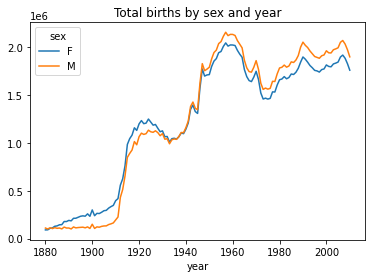

In [33]:
# 3. year 行分组， sex 列分组，聚合各年的出生总人数
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)
display(total_births)
total_births.plot(title='Total births by sex and year')

#### 插入一个prop列
- 4. prop列用于存放指定名字的婴儿数占当年同性总出生人数的比例。prop值为0.02表示每100名婴儿中有2名取了当前这个名字，我们先按year和sex分组，然后再将新列加到各个分组上。   
hint：使用apply

In [21]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
# 4. 插入一个prop列
names=names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
0,Mary,F,6919,1881,0.075243
0,Mary,F,8149,1882,0.075558
0,Mary,F,8012,1883,0.071331
0,Mary,F,9217,1884,0.071438
...,...,...,...,...,...
35001,Zymire,M,5,2008,0.000002
35002,Zyquarius,M,5,2008,0.000002
35003,Zyquavion,M,5,2008,0.000002
35004,Zyrell,M,5,2008,0.000002


验证prop列正确性，聚合后sum全为1.0表示正确

In [22]:
names.groupby(['year', 'sex']).prop.sum().all() == 1.0

True

####  提取数据子集
提取每对sex/year组合的prop前1000个名字作为数据子集:   
apply 方法如下:
```py
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
```

- 5. 写出按照迭代器访问分组的等价方法。

In [25]:
pieces = []
# 5. 按照迭代器访问分组的等价方法
for tb in names.groupby(['year','sex']):
    pieces+=[tb[1].sort_values(by='births',ascending=False)[:1000]]
top1000 = pd.concat(pieces, ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


#### 数据展示
我们先生成一张按year和name统计的总出生数透视表：

In [26]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

用DataFrame的plot方法绘制几个名字的曲线图

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

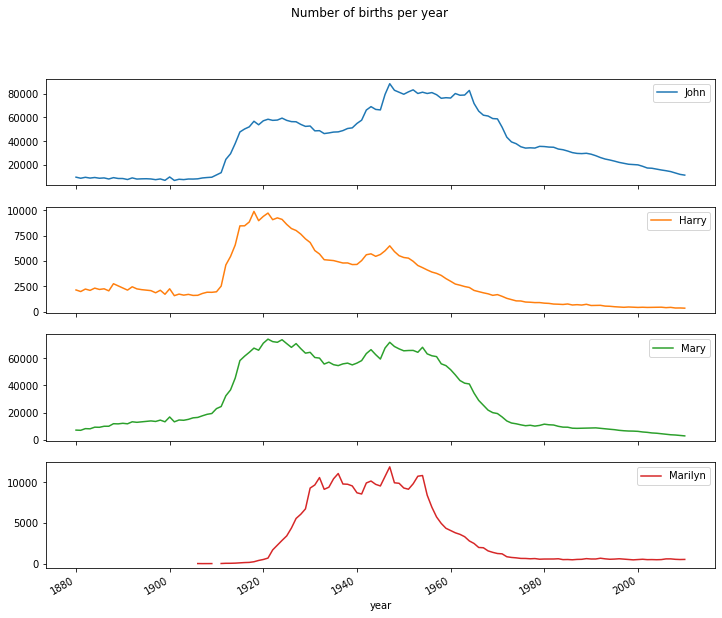

In [27]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### 姓名趋势的变化
一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”

首先找出以"lesl"开头的一组名字

In [28]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率：

In [29]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

按性别和年度进行聚合,
- 6.由于是在top1000基础上操作，这其中有缺失值，请填充


In [36]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
# 6.填充缺失值
table.fillna(0,inplace=True)
table


sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,0.0
2007,3805.0,0.0
2008,3022.0,0.0
